In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt
import arrow
import pandas as pd

In [2]:
def get_ssh(start, endtime, numberofdays):
    timerange = arrow.Arrow.range('day', start, endtime)
    sshV = np.empty((numberofdays))
    sshP = np.empty_like(sshV)
    time = []
    for it, r in enumerate(timerange):
        dir1 = r.format('DDMMMYY').lower()
        ymd = r.format('YYYYMMDD')
        filename = f'SalishSea_1d_{ymd}_{ymd}_grid_T.nc'
        with xr.open_dataset(os.path.join('/results2/SalishSea/nowcast-green.202111/', dir1, filename)) as ds:
            sshV[it] = ds.sossheig[0,iY_vs, iX_vs]
            sshP[it] = ds.sossheig[0, iY_pr, iX_pr]
            time.append(r.datetime)
    return time, sshV, sshP

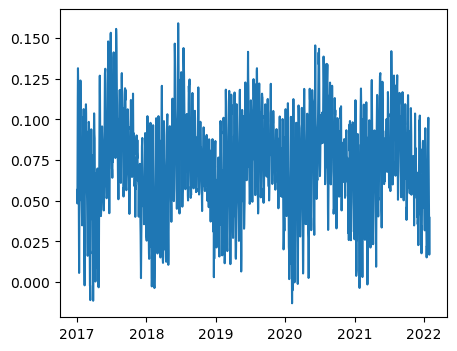

In [3]:
data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01jan18/SalishSea_1d_20180101_20180101_grid_T.nc')

iX_pr = 285
iY_pr = 386

iX_vs = 211
iY_vs = 255
data['sossheig']

start = dt.datetime(2017, 1, 1)
endtime = dt.datetime(2022, 1, 31)
numberofdays = int((endtime - start)/(dt.datetime(2017, 1, 2) - dt.datetime(2017, 1, 1)) + 1)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
time, sshV, sshP = get_ssh(start, endtime, numberofdays)
ax.plot(time, sshP-sshV)


In [4]:
data['sossheig']

<xarray.DataArray 'sossheig' (time_counter: 1, y: 898, x: 398)>
[357404 values with dtype=float32]
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2018-01-01T12:00:00
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
Attributes:
    standard_name:  sea_surface_height_above_geoid
    long_name:      Sea Surface Height
    units:          m

<AxesSubplot: >

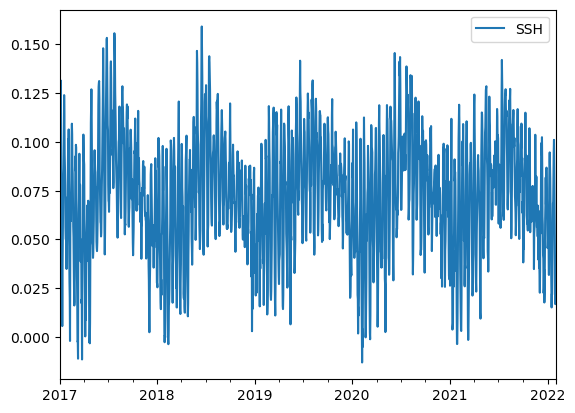

In [5]:
delta_ssh_arr = sshP-sshV

delta_ssh = pd.DataFrame(data={'SSH':delta_ssh_arr},index=time)
delta_ssh.rolling(window=4, center=True).mean()
delta_ssh.plot()

In [6]:
delta_ssh.to_csv('ssh_4day_mean_17-22.csv')

<AxesSubplot: >

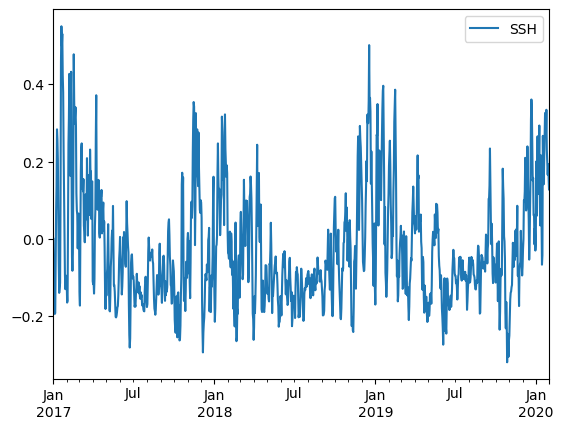

In [5]:
ssh_vicsill = pd.DataFrame(data={'SSH':sshV},index=time)
ssh_vicsill.rolling(window=4, center=True).mean()
ssh_vicsill.plot()

In [6]:
ssh_vicsill.to_csv('ssh_vicsill_4day_mean.csv')

In [7]:
iX_jdf = 50
iY_jdf = 360

def get_ssh(start, endtime, numberofdays):
    timerange = arrow.Arrow.range('day', start, endtime)
    sshV = np.empty((numberofdays))
    sshP = np.empty_like(sshV)
    time = []
    for it, r in enumerate(timerange):
        dir1 = r.format('DDMMMYY').lower()
        ymd = r.format('YYYYMMDD')
        filename = f'SalishSea_1d_{ymd}_{ymd}_grid_T.nc'
        with xr.open_dataset(os.path.join('/results2/SalishSea/nowcast-green.202111/', dir1, filename)) as ds:
            sshV[it] = ds.sossheig[0,iY_jdf, iX_jdf]
            time.append(r.datetime)
    return time, sshV

start = dt.datetime(2017, 1, 1)
endtime = dt.datetime(2022, 12, 31)
numberofdays = int((endtime - start)/(dt.datetime(2017, 1, 2) - dt.datetime(2017, 1, 1)) + 1)

time, sshJdF = get_ssh(start, endtime, numberofdays)


<AxesSubplot: >

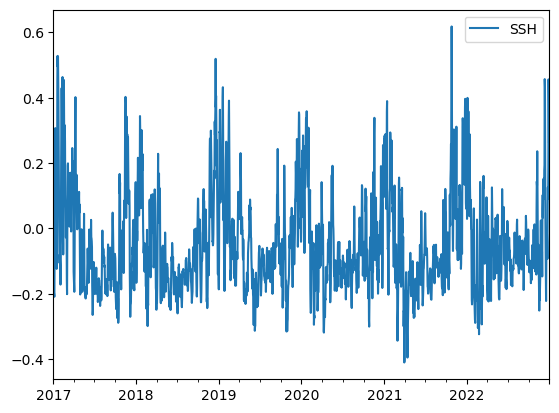

In [8]:
ssh_jdf = pd.DataFrame(data={'SSH':sshJdF},index=time)
ssh_jdf.rolling(window=4, center=True).mean()
ssh_jdf.plot()

In [9]:
ssh_jdf.to_csv('ssh_jdf_4day_mean_17-22.csv')